## Explosive Plays EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# dataset from the years 2018-2020
df = pd.read_pickle('df.pkl')

In [3]:
xpp_xrp_df = df[['game_date', 'yards_gained', 'play_type', 'posteam', 'defteam', 'down', 'fourth_down_failed']]

In [4]:
# drop NaN's
xpp_xrp_df = xpp_xrp_df.dropna()

In [5]:
# grab all plays that are run or pass
xpp_xrp_df = xpp_xrp_df.loc[(xpp_xrp_df['play_type'] == 'pass') | (xpp_xrp_df['play_type'] == 'run')]

In [6]:
# grab all plays that had over 16 yards passed or 12 yards rushed
xpp_xrp_df = xpp_xrp_df.loc[(xpp_xrp_df['yards_gained'] >= 16) & (xpp_xrp_df['play_type'] == 'pass')
                            | (xpp_xrp_df['yards_gained'] >= 12) & (xpp_xrp_df['play_type'] == 'run')]

In [7]:
xpp_xrp_df.play_type.value_counts()

pass    6855
run     2579
Name: play_type, dtype: int64

In [8]:
# weed out 4th down plays that pick up 16 pass yards or 12 rush yards but fail to convert 1st down
xpp_xrp_df.loc[(xpp_xrp_df['fourth_down_failed'] == 1) & (xpp_xrp_df['yards_gained'] >= 12)]

,game_date,yards_gained,play_type,posteam,defteam,down,fourth_down_failed
6605,2018-09-23,20.0,pass,DAL,SEA,4.0,1.0
29350,2018-11-22,27.0,pass,ATL,NO,4.0,1.0
38514,2018-12-15,16.0,pass,NYJ,HOU,4.0,1.0
52695,2019-09-15,17.0,pass,MIA,NE,4.0,1.0
120430,2020-11-15,19.0,pass,CIN,PIT,4.0,1.0


In [9]:
xpp_xrp_df = xpp_xrp_df.drop([6605, 29350, 38514, 52695, 120430], axis=0)

In [10]:
# you can see these 5 pass plays are no longer in the dataframe
xpp_xrp_df.play_type.value_counts()

pass    6850
run     2579
Name: play_type, dtype: int64

In [11]:
# convert the game_date column to datetime
xpp_xrp_df['game_date']= pd.to_datetime(xpp_xrp_df['game_date'], format='%Y-%m-%d')

In [12]:
# creating a year column
xpp_xrp_df['year'] = xpp_xrp_df['game_date'].dt.year

In [13]:
xpp_xrp_df.head()

,game_date,yards_gained,play_type,posteam,defteam,down,fourth_down_failed,year
5,2018-09-06,20.0,run,ATL,PHI,1.0,0.0,2018
8,2018-09-06,33.0,pass,ATL,PHI,3.0,0.0,2018
21,2018-09-06,26.0,pass,ATL,PHI,2.0,0.0,2018
59,2018-09-06,22.0,pass,ATL,PHI,2.0,0.0,2018
114,2018-09-06,18.0,pass,PHI,ATL,3.0,0.0,2018


In [14]:
xpp_xrp_df.year.value_counts()

2018    3722
2019    3604
2020    2103
Name: year, dtype: int64

In [15]:
# drop columns that are no longer needed
xpp_xrp_df = xpp_xrp_df.drop(['fourth_down_failed', 'game_date'], axis=1)

In [16]:
# create dataframes holding plays from respective year
df2018 = xpp_xrp_df.loc[(xpp_xrp_df['year'] == 2018)]
df2019 = xpp_xrp_df.loc[(xpp_xrp_df['year'] == 2019)]
df2020 = xpp_xrp_df.loc[(xpp_xrp_df['year'] == 2020)]

## Explosive Plays For 2018 Season

#### Offense & Defense

In [17]:
# number of explosive plays per team
off_xp_18 = df2018.posteam.value_counts()
# number of explosive plays given up team
def_xp_18 = df2018.defteam.value_counts(ascending=True)

In [18]:
off_xp_18 = pd.DataFrame({
    'Team': [x for x in off_xp_18.index.tolist()],
    'Explosive Plays (XP)': [x for x in off_xp_18.values],
    'XP/G': [x for x in np.round(off_xp_18.values/16, decimals=2)]
})

In [20]:
off_xp_18.head()

,Team,Explosive Plays (XP),XP/G
0,KC,155,9.69
1,LA,154,9.62
2,LAC,149,9.31
3,TB,149,9.31
4,NE,140,8.75


In [21]:
def_xp_18 = pd.DataFrame({
    'Team': [x for x in def_xp_18.index.tolist()],
    'Explosive Plays (XP)': [x for x in def_xp_18.values],
    'XP/G': [x for x in np.round(def_xp_18.values/16, decimals=2)]
})

In [22]:
def_xp_18.head()

,Team,Explosive Plays (XP),XP/G
0,CHI,80,5.00
1,MIN,85,5.31
2,JAX,87,5.44
3,HOU,98,6.12
4,BUF,100,6.25


In [23]:
# merge offensive and defensive dataframes
net_xp_18 = pd.merge(off_xp_18, def_xp_18, on="Team")

In [24]:
net_xp_18.head()

,Team,Explosive Plays (XP)_x,XP/G_x,Explosive Plays (XP)_y,XP/G_y
0,KC,155,9.69,147,9.19
1,LA,154,9.62,119,7.44
2,LAC,149,9.31,109,6.81
3,TB,149,9.31,134,8.38
4,NE,140,8.75,133,8.31


In [25]:
# create new column names
net_xp_18['NET XP'] = net_xp_18['Explosive Plays (XP)_x'] - net_xp_18['Explosive Plays (XP)_y']
net_xp_18['NET XP/G'] = net_xp_18['XP/G_x'] - net_xp_18['XP/G_y']

In [26]:
# drop columns other than NET values
net_xp_18 = net_xp_18.drop(['Explosive Plays (XP)_x', 'XP/G_x', 'Explosive Plays (XP)_y', 'XP/G_y'], axis=1)

In [27]:
# goal is to high have NET explosive plays (you are creating more explosive plays on offense than giving up on defense)
net_xp_18 = net_xp_18.sort_values(by='NET XP', ascending=False)

In [28]:
net_xp_18.head()

,Team,NET XP,NET XP/G
2,LAC,40,2.50
1,LA,35,2.18
22,MIN,22,1.38
10,BAL,22,1.38
13,PIT,17,1.06


## Explosive Plays For 2019 Season

#### Offense & Defense

In [29]:
# number of explosive plays per team
off_xp_19 = df2019.posteam.value_counts()
# number of explosive plays given up team
def_xp_19 = df2019.defteam.value_counts(ascending=True)

In [30]:
off_xp_19 = pd.DataFrame({
    'Team': [x for x in off_xp_19.index.tolist()],
    'Explosive Plays (XP)': [x for x in off_xp_19.values],
    'XP/G': [x for x in np.round(off_xp_19.values/16, decimals=2)]
})

In [31]:
def_xp_19 = pd.DataFrame({
    'Team': [x for x in def_xp_19.index.tolist()],
    'Explosive Plays (XP)': [x for x in def_xp_19.values],
    'XP/G': [x for x in np.round(def_xp_19.values/16, decimals=2)]
})

In [32]:
# merge offensive and defensive dataframes
net_xp_19 = pd.merge(off_xp_19, def_xp_19, on="Team")

In [33]:
# create new column names
net_xp_19['NET XP'] = net_xp_19['Explosive Plays (XP)_x'] - net_xp_19['Explosive Plays (XP)_y']
net_xp_19['NET XP/G'] = net_xp_19['XP/G_x'] - net_xp_19['XP/G_y']

In [34]:
# drop columns other than NET values
net_xp_19 = net_xp_19.drop(['Explosive Plays (XP)_x', 'XP/G_x', 'Explosive Plays (XP)_y', 'XP/G_y'], axis=1)

In [35]:
# goal is to high have NET explosive plays (you are creating more explosive plays on offense than giving up on defense)
net_xp_19 = net_xp_19.sort_values(by='NET XP', ascending=False)

## Explosive Plays For 2020 Season

#### Offense & Defense

In [36]:
# number of explosive plays per team
off_xp_20 = df2020.posteam.value_counts()
# number of explosive plays given up team
def_xp_20 = df2020.defteam.value_counts(ascending=True)

In [37]:
# season in progress, I will use a value of 10 because that is how many weeks have been played thus far
# values will be slightly different for some teams that have had already had their bye week (actually only played 9 games)

In [38]:
off_xp_20 = pd.DataFrame({
    'Team': [x for x in off_xp_20.index.tolist()],
    'Explosive Plays (XP)': [x for x in off_xp_20.values],
    'XP/G': [x for x in np.round(off_xp_20.values/10, decimals=2)]
})

In [39]:
def_xp_20 = pd.DataFrame({
    'Team': [x for x in def_xp_20.index.tolist()],
    'Explosive Plays (XP)': [x for x in def_xp_20.values],
    'XP/G': [x for x in np.round(def_xp_20.values/10, decimals=2)]
})

In [40]:
# merge offensive and defensive dataframes
net_xp_20 = pd.merge(off_xp_20, def_xp_20, on="Team")

In [41]:
# create new column names
net_xp_20['NET XP'] = net_xp_20['Explosive Plays (XP)_x'] - net_xp_20['Explosive Plays (XP)_y']
net_xp_20['NET XP/G'] = net_xp_20['XP/G_x'] - net_xp_20['XP/G_y']

In [42]:
# drop columns other than NET values
net_xp_20 = net_xp_20.drop(['Explosive Plays (XP)_x', 'XP/G_x', 'Explosive Plays (XP)_y', 'XP/G_y'], axis=1)

In [43]:
# goal is to high have NET explosive plays (you are creating more explosive plays on offense than giving up on defense)
net_xp_20 = net_xp_20.sort_values(by='NET XP', ascending=False)

## Season Comparison

In [44]:
# Team Color Dictionary
COLORS = {'ARI':'#97233F','ATL':'#A71930','BAL':'#241773','BUF':'#00338D','CAR':'#0085CA','CHI':'#00143F',
          'CIN':'#FB4F14','CLE':'#FB4F14','DAL':'#B0B7BC','DEN':'#002244','DET':'#046EB4','GB':'#24423C',
          'HOU':'#C9243F','IND':'#003D79','JAX':'#136677','KC':'#CA2430','LA':'#002147','LAC':'#2072BA',
          'LV':'#C4C9CC','MIA':'#0091A0','MIN':'#4F2E84','NE':'#0A2342','NO':'#A08A58','NYG':'#192E6C',
          'NYJ':'#203731','PHI':'#014A53','PIT':'#FFC20E','SEA':'#7AC142','SF':'#C9243F','TB':'#D40909',
          'TEN':'#4095D1','WAS':'#FFC20F'}

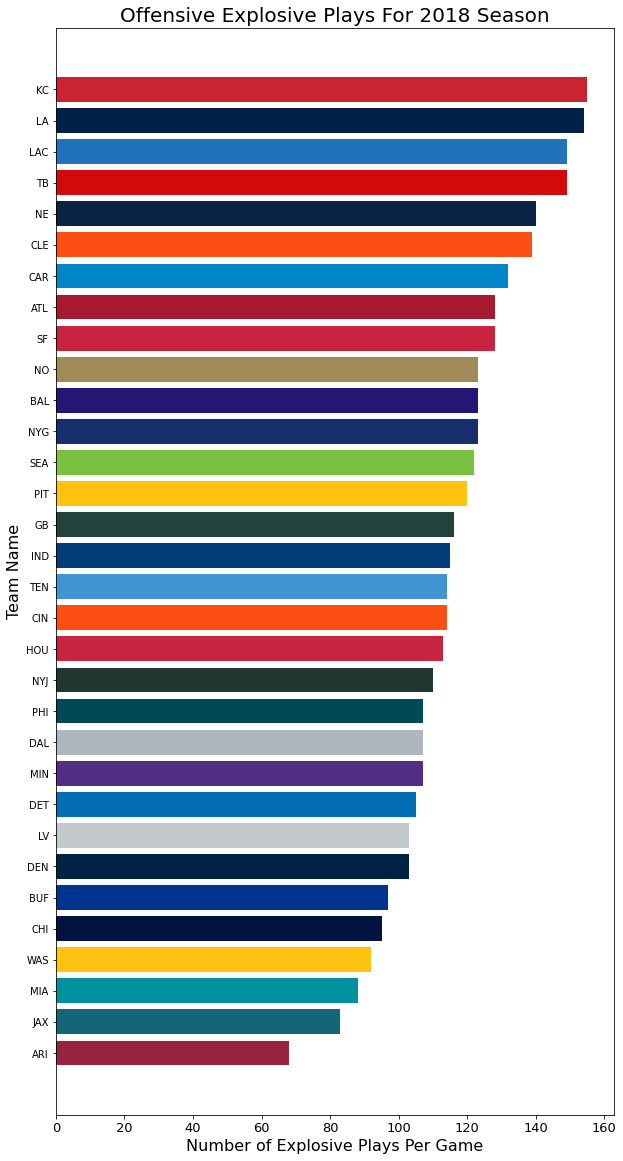

In [45]:
plt.figure(figsize=(10,20))

plt.barh(off_xp_18.Team.sort_index(ascending=False), 
         off_xp_18['Explosive Plays (XP)'].sort_index(ascending=False), 
         color=[COLORS[t] for t in off_xp_18.Team.sort_index(ascending=False)])

plt.title('Offensive Explosive Plays For 2018 Season', fontsize=20)
plt.ylabel('Team Name',fontsize=16)
plt.xticks(fontsize=13)
plt.xlabel('Number of Explosive Plays Per Game',fontsize=16)
plt.show()

#plt.savefig('xp_18.png', dpi=400)

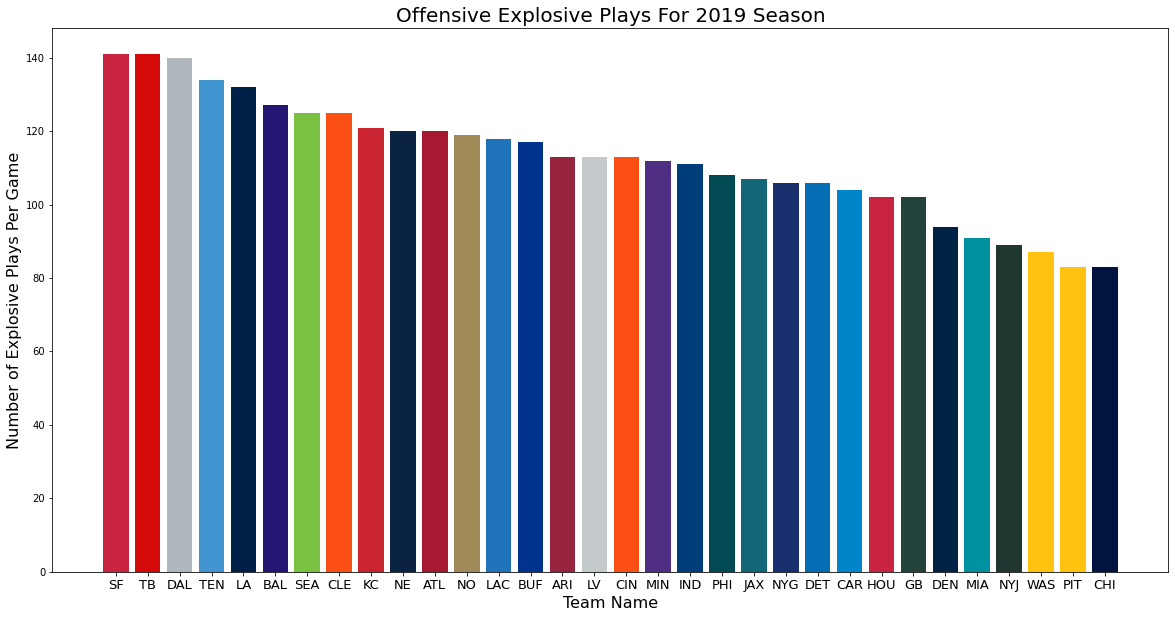

In [46]:
plt.figure(figsize=(20,10))

plt.bar(off_xp_19.Team, 
        off_xp_19['Explosive Plays (XP)'],
        color=[COLORS[t] for t in off_xp_19.Team])

plt.title('Offensive Explosive Plays For 2019 Season', fontsize=20)
plt.xlabel('Team Name',fontsize=16)
plt.xticks(fontsize=13)
plt.ylabel('Number of Explosive Plays Per Game',fontsize=16)
plt.show()

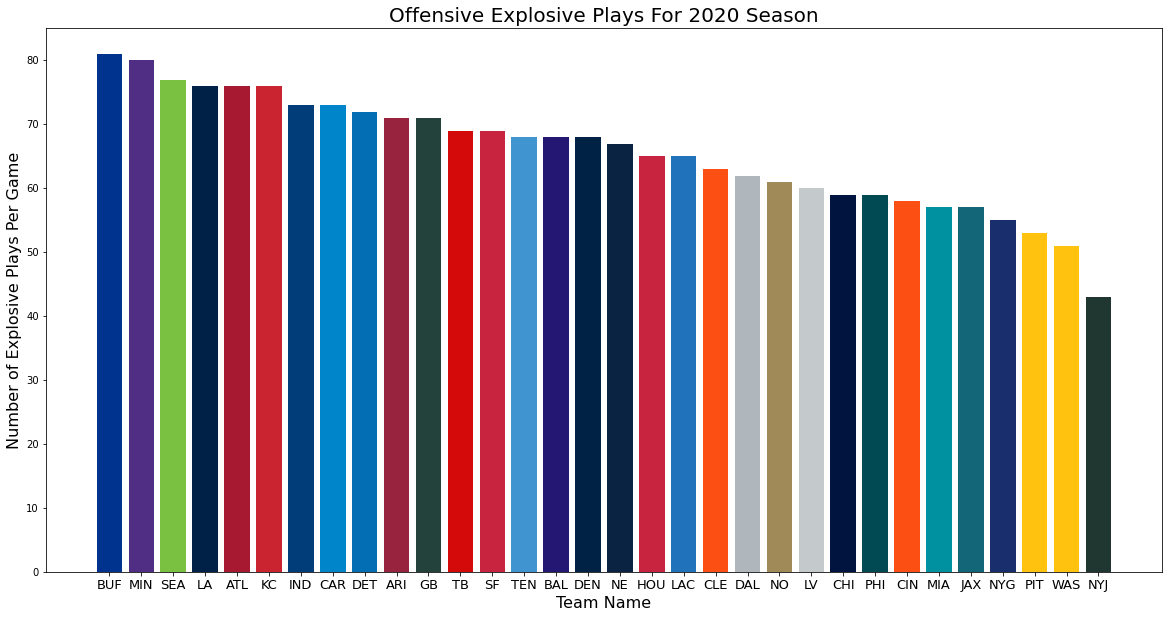

In [47]:
plt.figure(figsize=(20,10))

plt.bar(off_xp_20.Team,
        off_xp_20['Explosive Plays (XP)'],
        color=[COLORS[t] for t in off_xp_20.Team])

plt.title('Offensive Explosive Plays For 2020 Season', fontsize=20)
plt.xlabel('Team Name',fontsize=16)
plt.xticks(fontsize=13)
plt.ylabel('Number of Explosive Plays Per Game',fontsize=16)
plt.show()

#plt.savefig('xp_19.png', dpi=400)

## NET XP Season Comparison

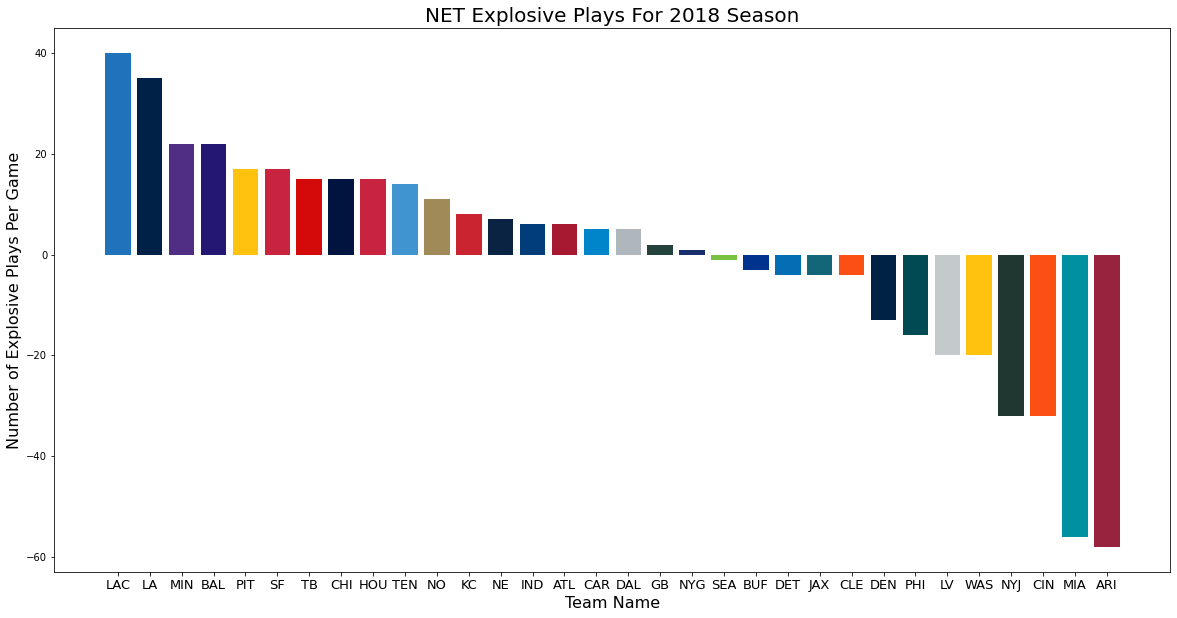

In [57]:
plt.figure(figsize=(20,10))

plt.bar(net_xp_18.Team,
        net_xp_18['NET XP'],
        color=[COLORS[t] for t in net_xp_18.Team])

plt.title('NET Explosive Plays For 2018 Season', fontsize=20)
plt.xlabel('Team Name',fontsize=16)
plt.xticks(fontsize=13)
plt.ylabel('Number of Explosive Plays Per Game',fontsize=16)
plt.show()

#plt.savefig('net_xp_18.png', dpi=400)

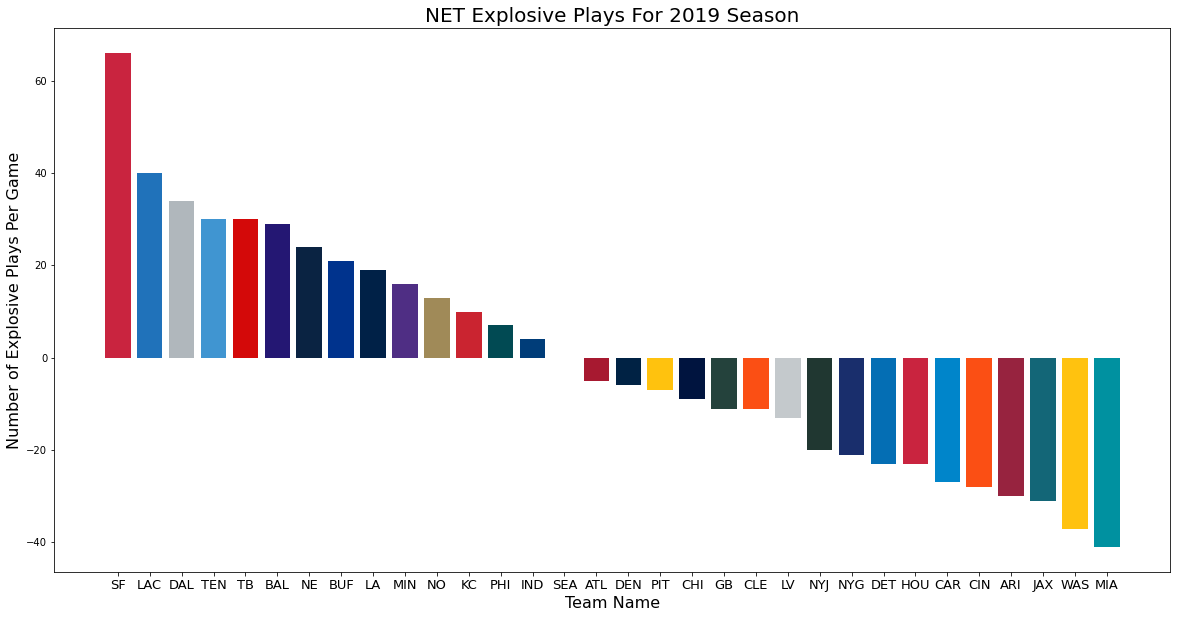

In [49]:
plt.figure(figsize=(20,10))

plt.bar(net_xp_19.Team,
        net_xp_19['NET XP'],
        color=[COLORS[t] for t in net_xp_19.Team])

plt.title('NET Explosive Plays For 2019 Season', fontsize=20)
plt.xlabel('Team Name',fontsize=16)
plt.xticks(fontsize=13)
plt.ylabel('Number of Explosive Plays Per Game',fontsize=16)
plt.show()

#plt.savefig('net_xp_19.png', dpi=400)

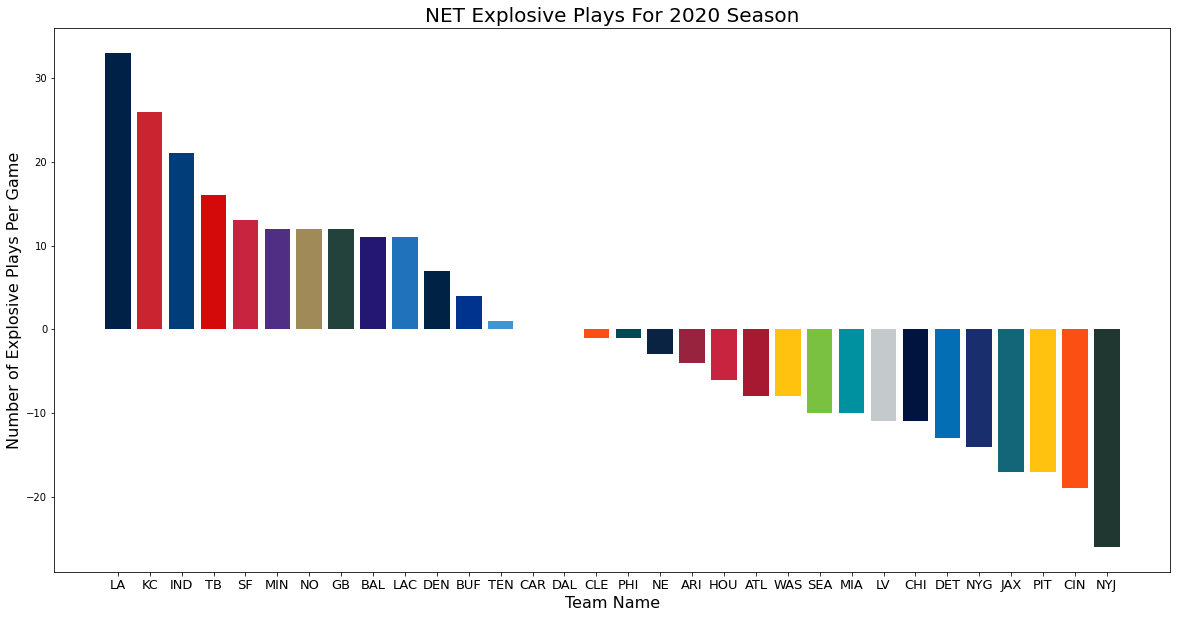

In [58]:
plt.figure(figsize=(20,10))

plt.bar(net_xp_20.Team,
        net_xp_20['NET XP'],
        color=[COLORS[t] for t in net_xp_20.Team])

plt.title('NET Explosive Plays For 2020 Season', fontsize=20)
plt.xlabel('Team Name',fontsize=16)
plt.xticks(fontsize=13)
plt.ylabel('Number of Explosive Plays Per Game',fontsize=16)
plt.show()

#plt.savefig('net_xp_20.png', dpi=400)

## Getting Team Logos

In [59]:
import os
import urllib.request
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [60]:
# I will be storing the team logos in a folder named 'logos'
urls = pd.read_csv('https://raw.githubusercontent.com/statsbylopez/BlogPosts/master/nfl_teamlogos.csv')

for i in range(0,len(urls)):
    urllib.request.urlretrieve(urls['url'].iloc[i], os.getcwd() + '/logos/' + urls['team_code'].iloc[i] + '.png')

In [61]:
def getImage(path): 
    return OffsetImage(plt.imread(path), zoom=.5)

In [62]:
# insert folder name where I have logos
logos = os.listdir(os.getcwd() + '/logos')

logos.sort() # sort the list alphabetically

logo_path_dic = {}

logo_paths = []

# insert folder name where I have logos
for i in logos:
    path = os.getcwd() + '/logos/' + str(i)
    logo_paths.append(path)
    logo_path_dic[i[:-4]] = path

In [63]:
# removing teams that moved cities from logos folder
logo_paths.remove('/Users/jonhickey/Documents/Flatiron/Phase5/Capstone/NFL-Play-Predictor/logos/STL.png')
logo_paths.remove('/Users/jonhickey/Documents/Flatiron/Phase5/Capstone/NFL-Play-Predictor/logos/OAK.png')
logo_paths.remove('/Users/jonhickey/Documents/Flatiron/Phase5/Capstone/NFL-Play-Predictor/logos/SD.png')
logo_paths.remove('/Users/jonhickey/Documents/Flatiron/Phase5/Capstone/NFL-Play-Predictor/logos/.DS_Store')


logo_path_dic.pop('STL')
logo_path_dic.pop('OAK')
logo_path_dic.pop('SD')
logo_path_dic.pop('.DS_Store')

KeyError: '.DS_Store'

In [ ]:
# if there are any logos not sized correctly, go into the folder where you saved the logos and
# adjust size to preference. I used 1.39

## Team Record DataFrames

In [64]:
# 2018 records for each team
records_18 = pd.DataFrame({
    'Team': ['ARI','ATL','BAL','BUF','CAR','CHI',
          'CIN','CLE','DAL','DEN','DET','GB',
          'HOU','IND','JAX','KC','LA','LAC',
          'LV','MIA','MIN','NE','NO','NYG',
          'NYJ','PHI','PIT','SEA','SF','TB',
          'TEN','WAS'],
    'Wins': [3, 7, 10, 6, 7, 12, 6, 7, 10, 6, 6, 6, 11,
             10, 5, 12, 13, 12, 4, 7, 8, 11, 13, 5, 4,
             9, 9, 10, 4, 5, 9, 7], 
    'Losses': [13, 9, 6, 10, 9, 4, 10, 8, 6, 10, 10, 9, 5,
               6, 11, 4, 3, 4, 12, 9, 7, 5, 3, 11, 12,
               7, 6, 6, 12, 11, 7, 9]})

In [65]:
# merge record data onto net xp data
merged_xp_record_18 = pd.merge(net_xp_18, records_18, on='Team')

In [67]:
# sort our merged data by team name so it matches up with our logos
merged_xp_record_18 = merged_xp_record_18.sort_values('Team')
merged_xp_record_18.head()

,Team,NET XP,NET XP/G,Wins,Losses
31,ARI,-58,-3.63,3,13
14,ATL,6,0.38,7,9
3,BAL,22,1.38,10,6
20,BUF,-3,-0.19,6,10
15,CAR,5,0.31,7,9


In [68]:
# 2019 records for each team
records_19 = pd.DataFrame({
    'Team': ['ARI','ATL','BAL','BUF','CAR','CHI',
          'CIN','CLE','DAL','DEN','DET','GB',
          'HOU','IND','JAX','KC','LA','LAC',
          'LV','MIA','MIN','NE','NO','NYG',
          'NYJ','PHI','PIT','SEA','SF','TB',
          'TEN','WAS'],
    'Wins': [5, 7, 14, 10, 5, 8, 2, 6, 8, 7, 3, 13, 10,
             7, 6, 12, 9, 5, 7, 5, 10, 12, 13, 4, 7, 9,
             8, 11, 13, 7, 9, 3], 
    'Losses': [10, 9, 2, 6, 11, 8, 14, 10, 8, 9, 12, 3, 6,
               9, 10, 4, 7, 11, 9, 11, 6, 4, 3, 12, 9, 7,
               8, 5, 3, 9, 7, 13]})

In [69]:
# merge record data onto net xp data
merged_xp_record_19 = pd.merge(net_xp_19, records_19, on='Team')

In [70]:
# sort our merged data by team name so it matches up with our logos
merged_xp_record_19 = merged_xp_record_19.sort_values('Team')
merged_xp_record_19.head()

,Team,NET XP,NET XP/G,Wins,Losses
28,ARI,-30,-1.88,5,10
15,ATL,-5,-0.31,7,9
5,BAL,29,1.82,14,2
7,BUF,21,1.31,10,6
26,CAR,-27,-1.69,5,11


In [71]:
records_20 = pd.DataFrame({
    'Team': ['ARI','ATL','BAL','BUF','CAR','CHI',
          'CIN','CLE','DAL','DEN','DET','GB',
          'HOU','IND','JAX','KC','LA','LAC',
          'LV','MIA','MIN','NE','NO','NYG',
          'NYJ','PHI','PIT','SEA','SF','TB',
          'TEN','WAS'],
    'Wins': [6, 3, 6, 7, 3, 5, 2, 6, 2, 3, 4, 7, 2, 6,
             1, 8, 6, 2, 6, 6, 4, 4, 7, 3, 0, 3, 9, 7,
             4, 7, 6, 2], 
    'Losses': [4, 6, 3, 3, 7, 5, 6, 3, 7, 6, 5, 2, 7, 3,
               8, 1, 3, 7, 3, 3, 5, 5, 2, 7, 9, 5, 0, 3,
               6, 3, 3, 7]})

In [72]:
# merge record data onto net xp data
merged_xp_record_20 = pd.merge(net_xp_20, records_20, on='Team')

In [73]:
# sort our merged data by team name so it matches up with our logos
merged_xp_record_20 = merged_xp_record_20.sort_values('Team')
merged_xp_record_20.head()

,Team,NET XP,NET XP/G,Wins,Losses
18,ARI,-4,-0.4,6,4
20,ATL,-8,-0.8,3,6
8,BAL,11,1.1,6,3
11,BUF,4,0.4,7,3
13,CAR,0,0.0,3,7


Text(0.81, 0.07, 'Data: nflfastR')

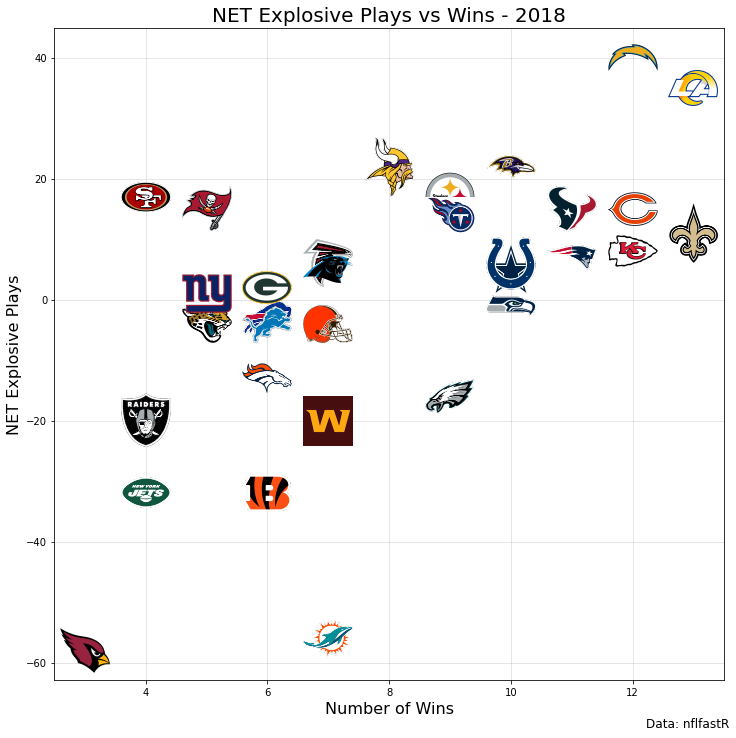

In [78]:
# Define x and y
x = merged_xp_record_18.Wins
y = merged_xp_record_18['NET XP']

# Create a figure with size 12x12
fig, ax = plt.subplots(figsize=(12,12))

# Make a scatter plot first to get the points to place logos
ax.scatter(x, y, s=.001)

# Adding logos to the chart
for x0, y0, path in zip(x, y, logo_paths):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False, fontsize=4)
    ax.add_artist(ab)
    
# Add a grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)
    
# Adding labels and text
ax.set_xlabel('Number of Wins', fontsize=16)
ax.set_ylabel('NET Explosive Plays', fontsize=16)
ax.set_title('NET Explosive Plays vs Wins - 2018', fontsize=20)
plt.figtext(.81, .07, 'Data: nflfastR', fontsize=12)

Text(0.81, 0.07, 'Data: nflfastR')

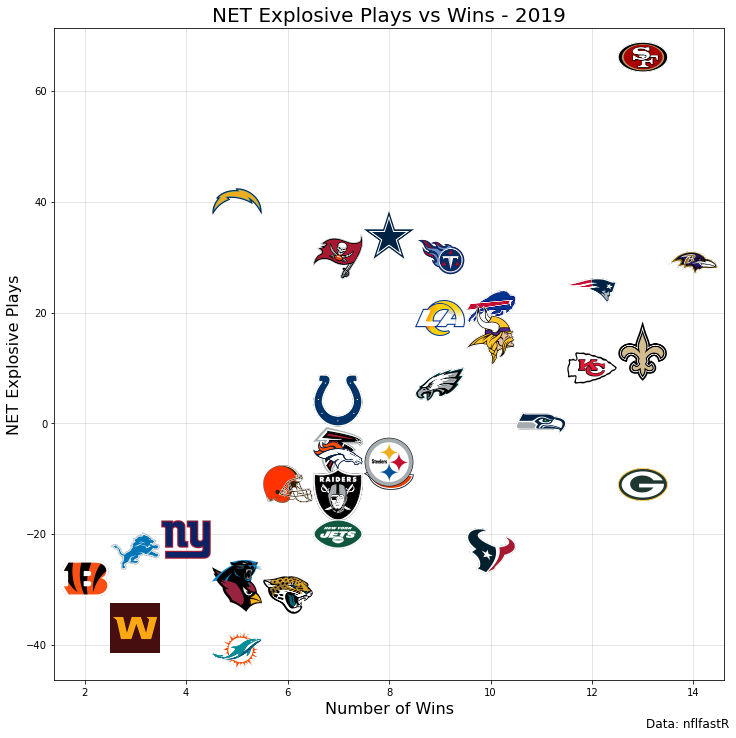

In [79]:
x = merged_xp_record_19.Wins
y = merged_xp_record_19['NET XP']

# Create a figure with size 12x12
fig, ax = plt.subplots(figsize=(12,12))

# Make a scatter plot first to get the points to place logos
ax.scatter(x, y, s=.001)

# Adding logos to the chart
for x0, y0, path in zip(x, y, logo_paths):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False, fontsize=4)
    ax.add_artist(ab)
    
# Add a grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)
    
# Adding labels and text
ax.set_xlabel('Number of Wins', fontsize=16)
ax.set_ylabel('NET Explosive Plays', fontsize=16)
ax.set_title('NET Explosive Plays vs Wins - 2019', fontsize=20)
plt.figtext(.81, .07, 'Data: nflfastR', fontsize=12)

Text(0.81, 0.07, 'Data: nflfastR')

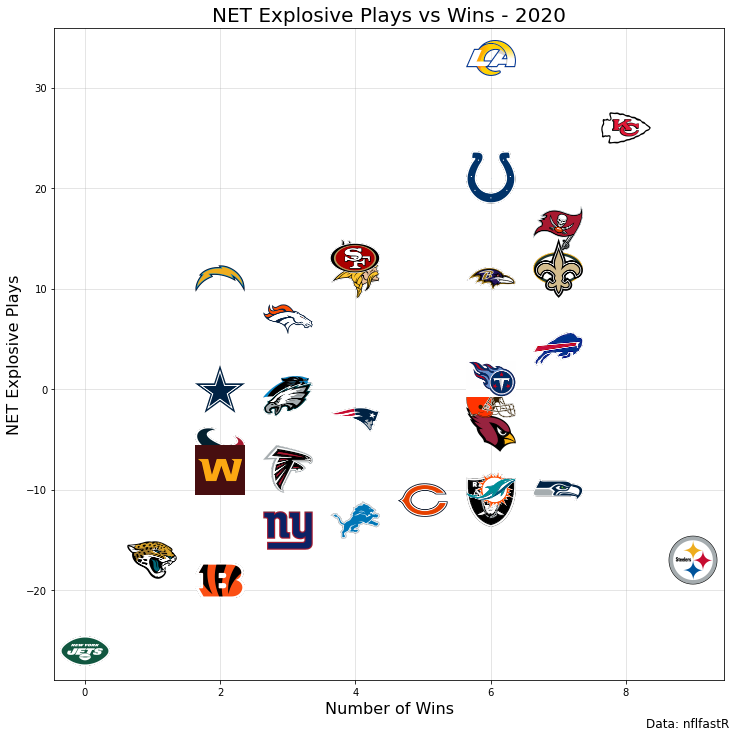

In [80]:
# Define x and y
x = merged_xp_record_20.Wins
y = merged_xp_record_20['NET XP']

# Create a figure with size 12x12
fig, ax = plt.subplots(figsize=(12,12))

# Make a scatter plot first to get the points to place logos
ax.scatter(x, y, s=.001)

# Adding logos to the chart
for x0, y0, path in zip(x, y, logo_paths):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False, fontsize=4)
    ax.add_artist(ab)
    
# Add a grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)
    
# Adding labels and text
ax.set_xlabel('Number of Wins', fontsize=16)
ax.set_ylabel('NET Explosive Plays', fontsize=16)
ax.set_title('NET Explosive Plays vs Wins - 2020', fontsize=20)
plt.figtext(.81, .07, 'Data: nflfastR', fontsize=12)

<ipython-input-83-aeb7843e5adf>:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7],fontsize=16)


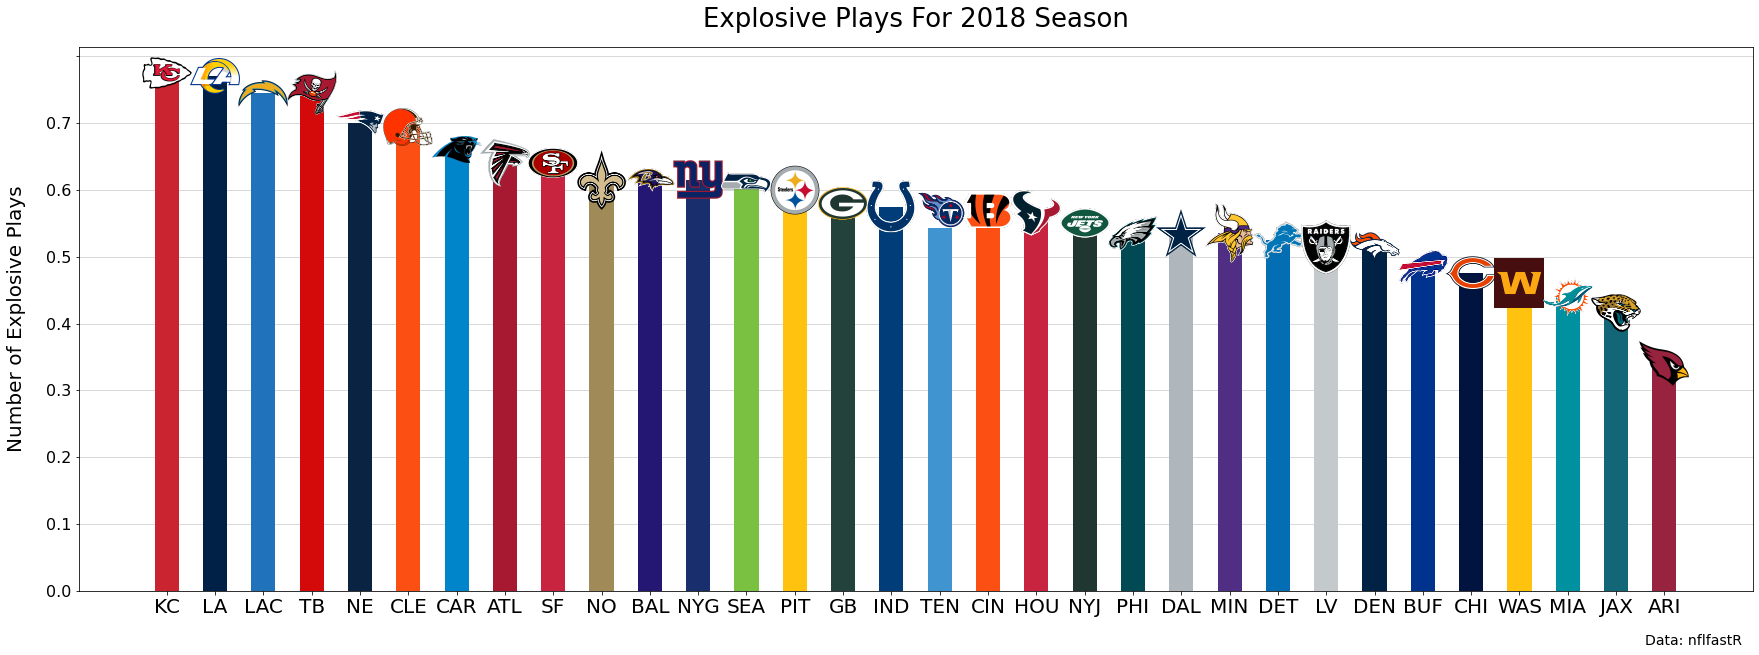

In [83]:
teams = off_xp_18

# Add team colors
teams['color'] = [COLORS[t] for t in off_xp_18.Team]

# Add path column where each row will have the location of the team's logo
teams['path'] = [logo_path_dic[t] for t in off_xp_18.Team]



fig, ax = plt.subplots(figsize=(30,10))

# Add logos
# X data is an array from 0-31 (for 32 teams)
for x0, y0, path in zip(np.arange(0,32),teams['Explosive Plays (XP)']+.005,teams['path']):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False, fontsize=4)
    ax.add_artist(ab)

# Create bar chart, setting colors equal to the 32 team color series
ax.bar(np.arange(0,32),teams['Explosive Plays (XP)'], color=teams.color, width=.5)
    
# Add grid
ax.grid(zorder=0,alpha=.6,axis='y')
ax.set_axisbelow(True)

# Set x-ticks labels to be team abbreviations
ax.set_xticks(np.arange(0,32))
ax.set_xticklabels(teams.Team,fontsize=20)

# Manually adjust y-axis
ax.set_yticklabels([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7],fontsize=16)

# Set labels and give source
ax.set_ylabel('Number of Explosive Plays',fontsize=20,labelpad=20)
ax.set_title('Explosive Plays For 2018 Season',
             fontsize=26,pad=20)
plt.figtext(.85,.05,'Data: nflfastR',fontsize=14)


# plt.savefig('xp_18.png',dpi=400)
# plt.show()

<ipython-input-84-79b001c677b5>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7],fontsize=16)


Text(0.85, 0.05, 'Data: nflfastR')

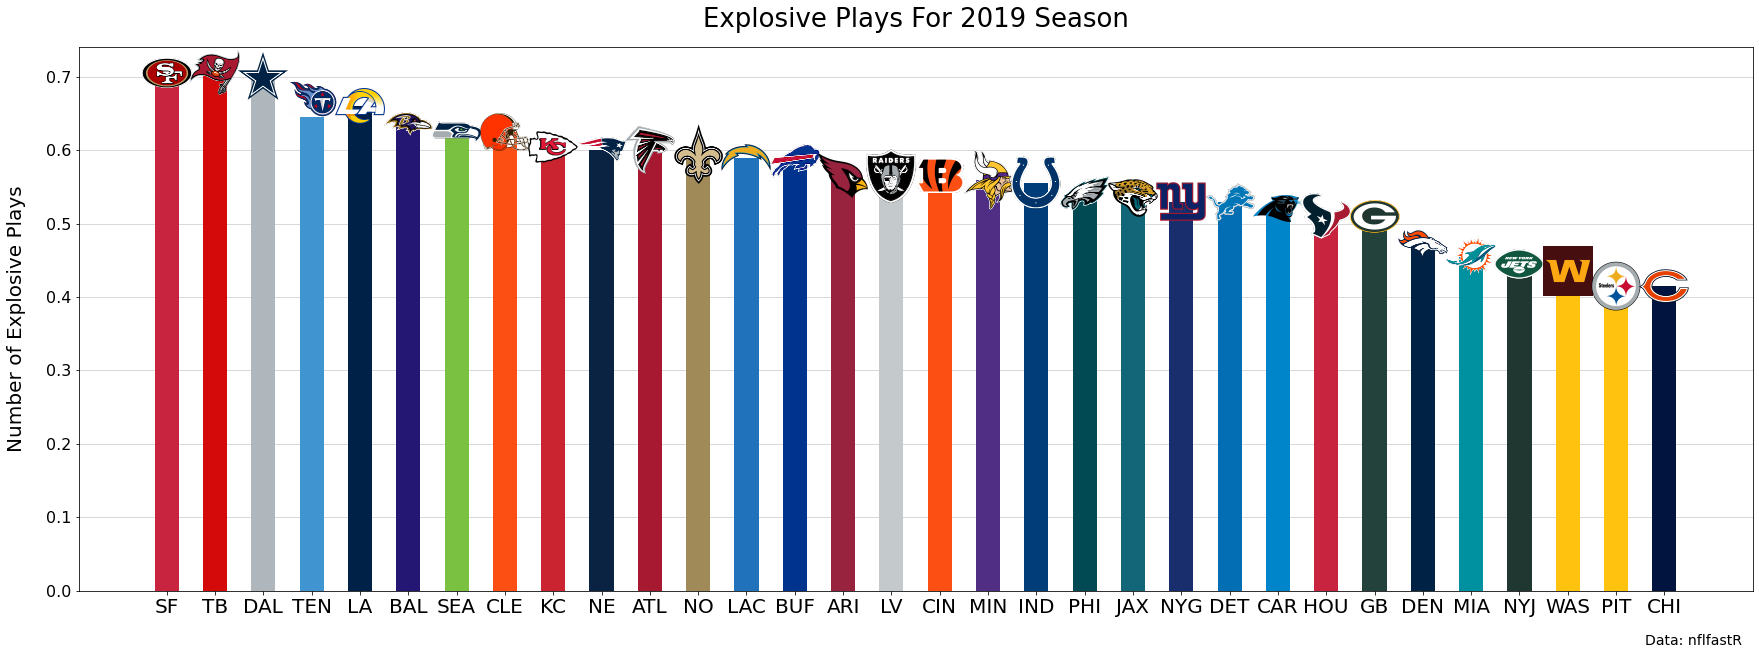

In [84]:
teams = off_xp_19

# Add team colors
teams['color'] = [COLORS[t] for t in off_xp_19.Team]

# Add path column where each row will have the location of the team's logo
teams['path'] = [logo_path_dic[t] for t in off_xp_19.Team]



fig, ax = plt.subplots(figsize=(30,10))

# Add logos
# X data is an array from 0-31 (for 32 teams)
for x0, y0, path in zip(np.arange(0,32),teams['Explosive Plays (XP)']+.005,teams['path']):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False, fontsize=4)
    ax.add_artist(ab)

# Create bar chart, setting colors equal to the 32 team color series
ax.bar(np.arange(0,32),teams['Explosive Plays (XP)'], color=teams.color, width=.5)
    
# Add grid
ax.grid(zorder=0,alpha=.6,axis='y')
ax.set_axisbelow(True)

# Set x-ticks labels to be team abbreviations
ax.set_xticks(np.arange(0,32))
ax.set_xticklabels(teams.Team,fontsize=20)

# Manually adjust y-axis
ax.set_yticklabels([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7],fontsize=16)

# Set labels and give source
ax.set_ylabel('Number of Explosive Plays',fontsize=20,labelpad=20)
ax.set_title('Explosive Plays For 2019 Season',
             fontsize=26,pad=20)
plt.figtext(.85,.05,'Data: nflfastR',fontsize=14)

<ipython-input-85-5e42da28e837>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7],fontsize=16)


Text(0.85, 0.05, 'Data: nflfastR')

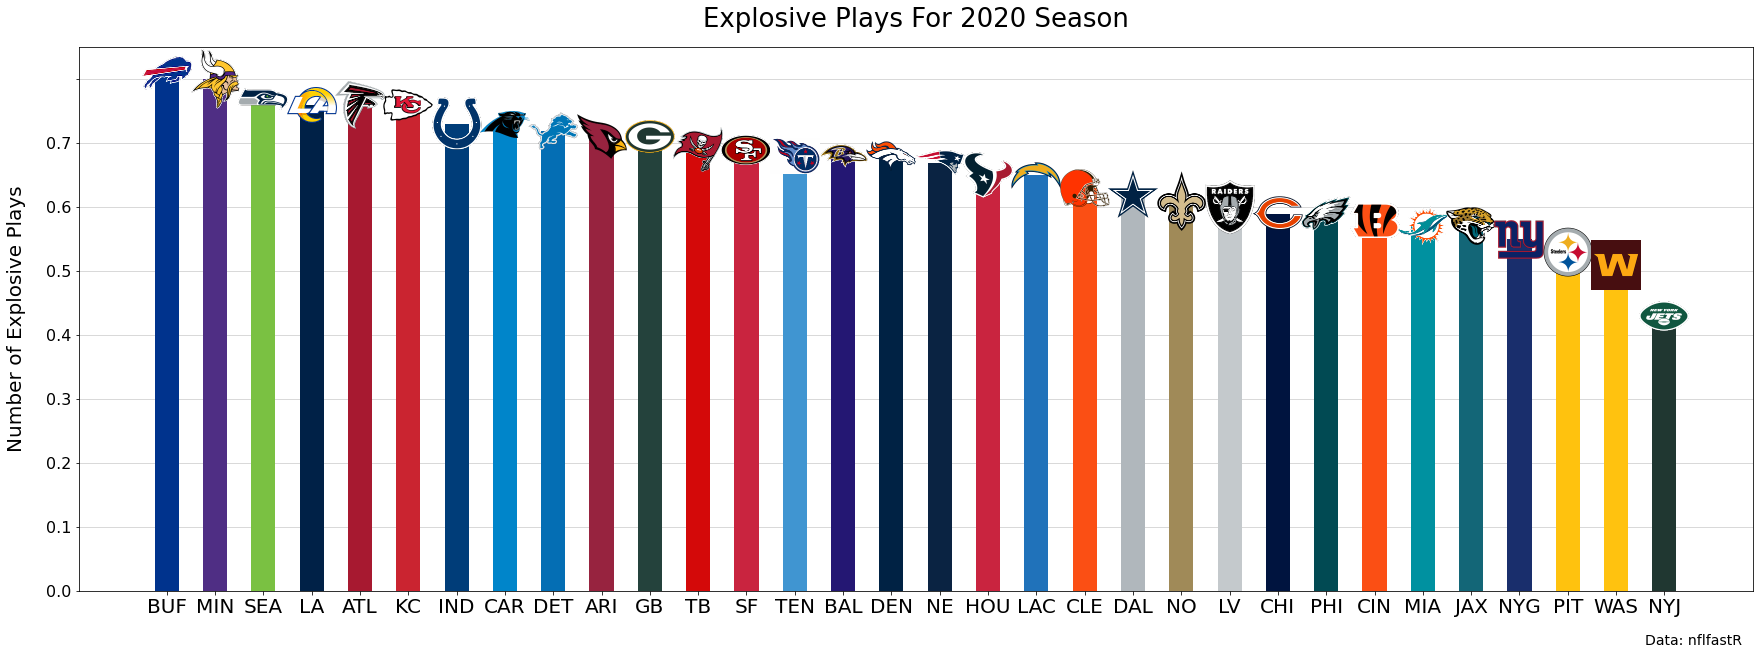

In [85]:
teams = off_xp_20

# Add team colors
teams['color'] = [COLORS[t] for t in off_xp_20.Team]

# Add path column where each row will have the location of the team's logo
teams['path'] = [logo_path_dic[t] for t in off_xp_20.Team]



fig, ax = plt.subplots(figsize=(30,10))

# Add logos
# X data is an array from 0-31 (for 32 teams)
for x0, y0, path in zip(np.arange(0,32),teams['Explosive Plays (XP)']+.005,teams['path']):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False, fontsize=4)
    ax.add_artist(ab)

# Create bar chart, setting colors equal to the 32 team color series
ax.bar(np.arange(0,32),teams['Explosive Plays (XP)'], color=teams.color, width=.5)
    
# Add grid
ax.grid(zorder=0,alpha=.6,axis='y')
ax.set_axisbelow(True)

# Set x-ticks labels to be team abbreviations
ax.set_xticks(np.arange(0,32))
ax.set_xticklabels(teams.Team,fontsize=20)

# Manually adjust y-axis
ax.set_yticklabels([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7],fontsize=16)

# Set labels and give source
ax.set_ylabel('Number of Explosive Plays',fontsize=20,labelpad=20)
ax.set_title('Explosive Plays For 2020 Season',
             fontsize=26,pad=20)
plt.figtext(.85,.05,'Data: nflfastR',fontsize=14)